In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


RSEED = 45


In [2]:
# import the modeling csv file
df_kickstarter = pd.read_csv('data/kickstarter_modeling.csv')
df_kickstarter.head()

,funding_goal,outcome,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,1000,0,39,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80000,0,87,2009,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20,1,8,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,1,79,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,0,28,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# define the target and features
X = df_kickstarter.drop('outcome', axis=1)
y = df_kickstarter['outcome']
X.shape, y.shape

((331462, 196), (331462,))

In [4]:
# do the test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RSEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248596, 196), (82866, 196), (248596,), (82866,))

In [5]:
# train basic knn model
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [6]:
# predictions
# y_pred_train = knn.predict(X_train)
# y_pred = knn.predict(X_test)

In [7]:
# Confusion matrix using pandas crosstab
# conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# sns.heatmap(conf_matrix, annot=True)

In [8]:
# function to display the scores
def get_scores(y_pred_train, y_pred, y_train=y_train, y_test=y_test):
    '''
    Getting all the scores to rate the model

    y_pred_train = predicted y of the training data
    
    y_pred = predicted y of the test data
    '''
    acc_train = accuracy_score(y_pred_train, y_train)
    acc = accuracy_score(y_pred, y_test)
    print(f'Train accuracy is : {acc_train}')
    print(f'Test accuracy is : {acc}')

    print('---' * 17)

    prec_train = precision_score(y_pred_train, y_train)
    prec = precision_score(y_pred, y_test)
    print(f'Train precision is : {prec_train}')
    print(f'Test precision is : {prec}')

    print('---' * 17)

    reca_train = recall_score(y_pred_train, y_train)
    reca = recall_score(y_pred, y_test)
    print(f'Train recall is : {reca_train}')
    print(f'Test recall is : {reca}')

    print('---' * 17)

    f1_train = f1_score(y_pred_train, y_train)
    f1 = f1_score(y_pred, y_test)
    print(f'Train f1 score is : {f1_train}')
    print(f'Test f1 score is : {f1}')

    print('---' * 17)

    roc_train = roc_auc_score(y_pred_train, y_train)
    roc = roc_auc_score(y_pred, y_test)
    print(f'Train roc_auc is : {roc_train}')
    print(f'Test roc_auc is : {roc}')

In [9]:
# get_scores(y_pred_train, y_pred)

This data set is so huge that already with the most simple KNN it takes ages. I really need a dimensionality reduction. To get rid of unnecessary features I want to do a principal component analysis.
I learned that I need to standardise the data in order to be able to do the PCA. So here we go standardising.

In [10]:
X_train.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
97463,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141730,38000,37,2014,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
183714,47348,24,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208796,5000,59,2015,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
274154,2500,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# scaling the train data with standard scaler, I scaling the categories: funding_goal, funding_period and launch_year
col_scale = ['funding_goal', 'funding_period', 'launch_year']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_train_preprocessed.columns = X_train.columns
X_train_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,-0.036064,-0.311912,-0.610762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.002353,0.317820,-0.092743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.006400,-0.705494,0.425276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.033254,2.049583,0.425276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.035595,-0.311912,0.943295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_test.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
259864,4000,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
75338,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
179807,195909,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327632,1214,29,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192323,1000,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# scaling the test data the same way
X_test_scaled = scaler.fit_transform(X_test[col_scale])
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_test_preprocessed.columns = X_test.columns
X_test_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,-0.033104,-0.308861,0.942259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.034737,-0.308861,-0.609959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.123558,-0.308861,0.424853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.035378,-0.308861,1.459665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.035553,-0.308861,0.424853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# now I can run the PCA

pca = PCA()
pca.fit (X_train_preprocessed)
pca_data = pca.transform(X_train_preprocessed)

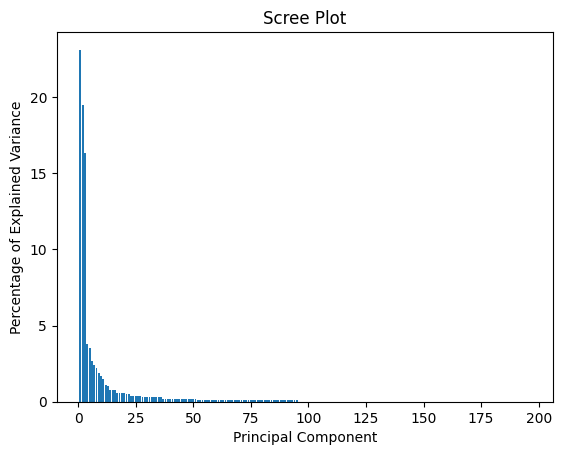

In [15]:
# check the percentage of variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(x=range(1,len(per_var) + 1), height=per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [16]:
per_var

array([23.1, 19.5, 16.3,  3.8,  3.5,  2.7,  2.4,  2.2,  1.9,  1.7,  1.5,
        1.1,  1. ,  0.8,  0.8,  0.8,  0.6,  0.6,  0.6,  0.6,  0.5,  0.5,
        0.4,  0.4,  0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

### Interpretation of the Scree Plot

The first 27 PCs explain 88.5 % of the variance. This is the cut-off that I will chose to go on.

In [17]:
# Access loadings (components)
loadings = pca.components_

# Interpret loadings
for i, pc_loadings in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    top_features = np.argsort(np.abs(pc_loadings))[::-1][:5]  # Top 5 features with highest absolute loadings
    for j, feature_index in enumerate(top_features):
        feature_name = X_train_preprocessed.columns[feature_index]  # Assuming X_train_preprocessed is a DataFrame
        print(f"\tFeature {j+1}: {feature_name} (Loading: {pc_loadings[feature_index]:.3f})")


Principal Component 1:
	Feature 1: launch_year (Loading: -0.726)
	Feature 2: funding_period (Loading: 0.672)
	Feature 3: country_United States (Loading: 0.101)
	Feature 4: category_Film & Video (Loading: 0.053)
	Feature 5: category_Music (Loading: 0.044)
Principal Component 2:
	Feature 1: funding_goal (Loading: 0.989)
	Feature 2: launch_year (Loading: 0.113)
	Feature 3: funding_period (Loading: 0.091)
	Feature 4: country_United States (Loading: -0.019)
	Feature 5: category_Technology (Loading: 0.011)
Principal Component 3:
	Feature 1: funding_period (Loading: -0.735)
	Feature 2: launch_year (Loading: -0.647)
	Feature 3: funding_goal (Loading: 0.145)
	Feature 4: country_United States (Loading: 0.107)
	Feature 5: category_Film & Video (Loading: 0.046)
Principal Component 4:
	Feature 1: country_United States (Loading: -0.762)
	Feature 2: country_United Kingdom (Loading: 0.445)
	Feature 3: category_Film & Video (Loading: 0.325)
	Feature 4: category_Music (Loading: -0.228)
	Feature 5: launc

In [18]:
pca.explained_variance_ratio_

# I don't know, somehow I cannot get the information how to trace back to which feature which PCA here belongs, I think I cannot use it

array([2.30921185e-01, 1.94504902e-01, 1.63236894e-01, 3.76572769e-02,
       3.46884042e-02, 2.70300428e-02, 2.38874881e-02, 2.24007738e-02,
       1.94834349e-02, 1.71363320e-02, 1.54181292e-02, 1.07999263e-02,
       9.93309732e-03, 8.48217823e-03, 7.74991969e-03, 7.61686173e-03,
       6.49479404e-03, 6.07135875e-03, 5.80415505e-03, 5.67743377e-03,
       4.84056259e-03, 4.54634731e-03, 4.27823145e-03, 3.93328048e-03,
       3.87920861e-03, 3.77418831e-03, 3.60960690e-03, 3.42688538e-03,
       3.27976229e-03, 3.22111973e-03, 3.19264994e-03, 3.14894215e-03,
       3.12019909e-03, 2.86734946e-03, 2.76306820e-03, 2.50346598e-03,
       2.32229803e-03, 2.22878387e-03, 2.18364929e-03, 2.02897259e-03,
       2.00208166e-03, 1.89348412e-03, 1.87605988e-03, 1.82744580e-03,
       1.74933753e-03, 1.71042294e-03, 1.67878715e-03, 1.65441455e-03,
       1.64985807e-03, 1.52730957e-03, 1.51377568e-03, 1.46916510e-03,
       1.45323498e-03, 1.41736442e-03, 1.40863041e-03, 1.35548605e-03,
      

In [19]:
# I will try to do a randomized search to get better parameters. Lets see how long this takes without having the dimensionality reduction with PCA

param_grid = {'n_neighbors': [2,4,3,5,10,20],
              'weights': ['uniform', 'distance'],
              'p': [1,2,3],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']
            }

# instantiate the search
rs = RandomizedSearchCV(KNeighborsClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# funciton to print out the results of the search
def print_pretty_summary(name, model, y_test, y_pred_test):
    print(name)
    print('=======================')
    print('n_neighbors: {}'.format(model.n_neighbors))
    print('weights: {}'.format(model.weights))
    print('p: {}'.format(model.p))
    print('algorithm: {}'.format(model.algorithm))

    precision = precision_score(y_test, y_pred_test)
    print('Test precision: {:2f}'.format(precision))
    return precision

In [ ]:
# getting the best score
print('Best score:', round(rs.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs.best_params_)

In [ ]:
# assingning the best fitted parameters
knn_best = rs.best_estimator_

y_pred_test_rs = knn_best.predict(X_test_preprocessed)

rknn_precision = print_pretty_summary('KNNClassifier model (randomizedGSCV)', knn_best, y_test, y_pred_test_rs)

In [ ]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)